# Student performance analysis

In [106]:
# import modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Overview Dataset

In [11]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [13]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## Data cleaning

In [8]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [16]:
category_cols = df.select_dtypes(include="object").columns
category_cols = [cat for cat in category_cols]
category_cols.remove('student_id')
category_cols

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

## Visualize the data

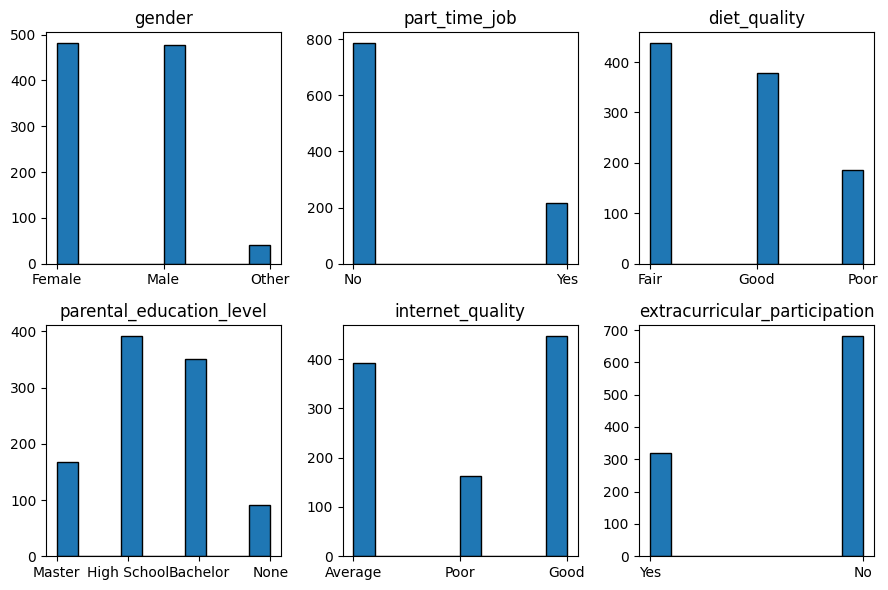

In [41]:
plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(df[category_cols[i]], edgecolor='black')
    plt.title(category_cols[i])

plt.tight_layout()
plt.show()

In [29]:
num_col = df.select_dtypes(exclude='object')
num_col = [nums for nums in num_col]
num_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

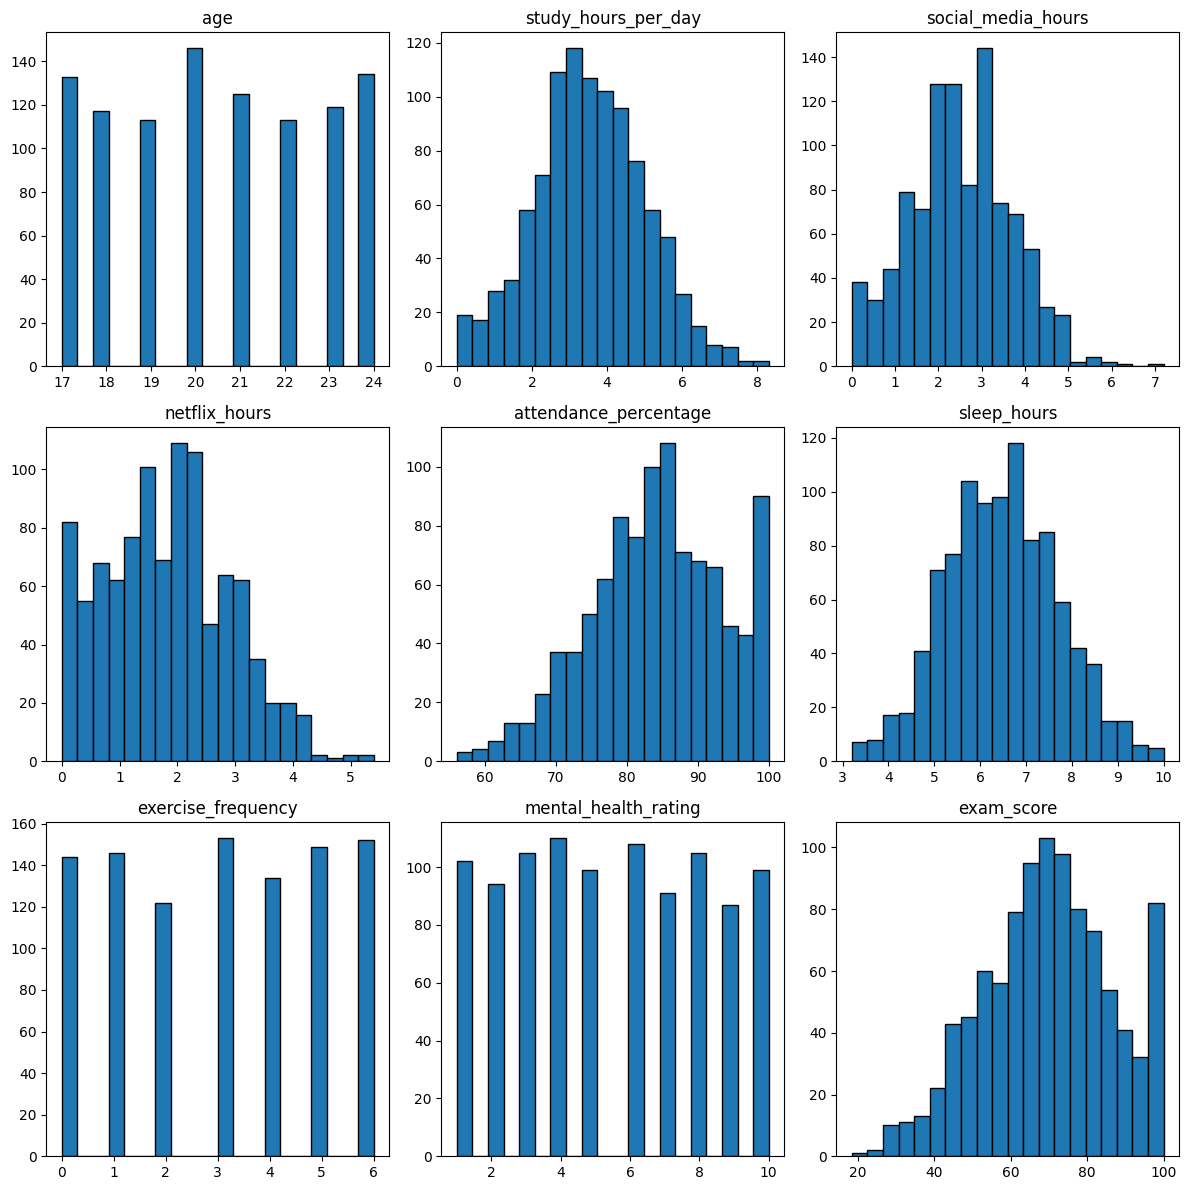

In [42]:
plt.figure(figsize=(12,12))
for i in range(len(num_col)):
    plt.subplot(3, 3, i+1)
    plt.hist(df[num_col[i]], bins=20, edgecolor='black')
    plt.title(num_col[i])

plt.tight_layout()
plt.show()

In [44]:
# df without student_id
df2 = df.drop(columns='student_id')
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Encode features

In [45]:
category_cols

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

labelencoding = diet_quality, parental_education_level, internet_quality

OHE = gender, part_time_job, extracurricular_participation

In [92]:
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2, 'None': 3}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [93]:
df2['diet_encoded'] = df2['diet_quality'].map(diet_quality)
df2['parental_encoded'] = df['parental_education_level'].map(parental_education_level)
df2['internet_encoded'] = df['internet_quality'].map(internet_quality)
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,diet_encoded,parental_encoded,internet_encoded
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,1,2,1
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,2,0,1
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,0,0,0
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,0,2,2
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,1,2,2


In [94]:
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']],drop_first=True)
dummies.head()

,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,0,0,0,1
1,0,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,0


In [95]:
df3 = pd.concat([df2,dummies], axis=1)

In [96]:
df3 = df3.drop(columns=['gender', 'part_time_job', 'extracurricular_participation', 'diet_quality', 'parental_education_level', 'internet_quality'])

## Correlation & Heat Map

<AxesSubplot: >

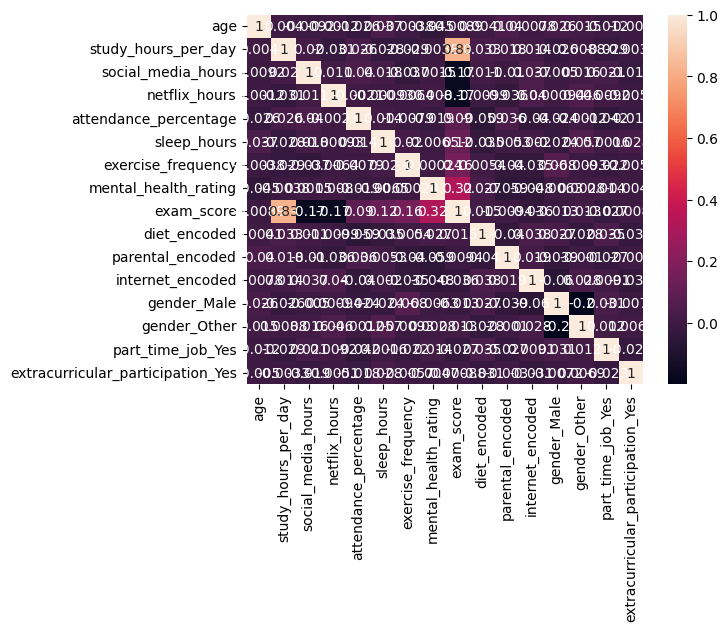

In [97]:
correlation = df3.corr()
sns.heatmap(correlation, annot=True)

In [99]:
X = df3.drop(columns='exam_score')
y = df3['exam_score']
X.shape, y.shape

((1000, 15), (1000,))

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_shape = X_scaled.shape
X_scaled

array([[ 1.08455114, -2.41806844, -1.11406369, ..., -0.20938323,
        -0.52334057,  1.46446375],
       [-0.21586989,  2.28170684,  0.25131502, ..., -0.20938323,
        -0.52334057, -0.6828438 ],
       [ 0.21760379, -1.46449085,  0.50732352, ..., -0.20938323,
        -0.52334057, -0.6828438 ],
       ...,
       [-0.21586989, -0.37468788,  0.08064268, ..., -0.20938323,
        -0.52334057,  1.46446375],
       [ 1.51802481,  1.26001656,  1.36068521, ..., -0.20938323,
         1.91080161, -0.6828438 ],
       [-0.64934357,  0.51077703,  0.33665119, ..., -0.20938323,
        -0.52334057, -0.6828438 ]])

## Train Test

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 15), (200, 15), (800,), (200,))

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.899062193908247

## Results

In [108]:
# Compare Linear regression with other models

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} → R2: {r2_score(y_test, y_pred):.3f}, RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

Linear → R2: 0.899, RMSE: 5.09
Ridge → R2: 0.899, RMSE: 5.09
Lasso → R2: 0.898, RMSE: 5.10
Random Forest → R2: 0.810, RMSE: 6.98
